In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('final_dataset.csv')
print(df.head())

   Year             Name               College POS  Height (in)  Weight (lbs)  \
0  1987       Mike Adams         Arizona State  CB         69.8           198   
1  1987     John Adickes                Baylor   C         74.8           266   
2  1987       Tommy Agee                Auburn  FB         71.8           217   
3  1987  David Alexander            Tulsa (OK)   C         75.0           279   
4  1987    Lyneal Alston  Southern Mississippi  WR         72.1           202   

   40 Yard  Bench Press  Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  \
0     4.42           13            32.0              118     4.60   7.31   
1     4.97           25            26.5              103     4.60   7.31   
2     4.81           15            28.7              109     4.45   7.31   
3     5.13           22            27.5              105     4.33   7.31   
4     4.64            7            32.0              114     4.52   7.31   

   Pro Bowl  
0         0  
1         0  
2         0  


In [3]:
df = df.drop(columns=["College", "Name"])

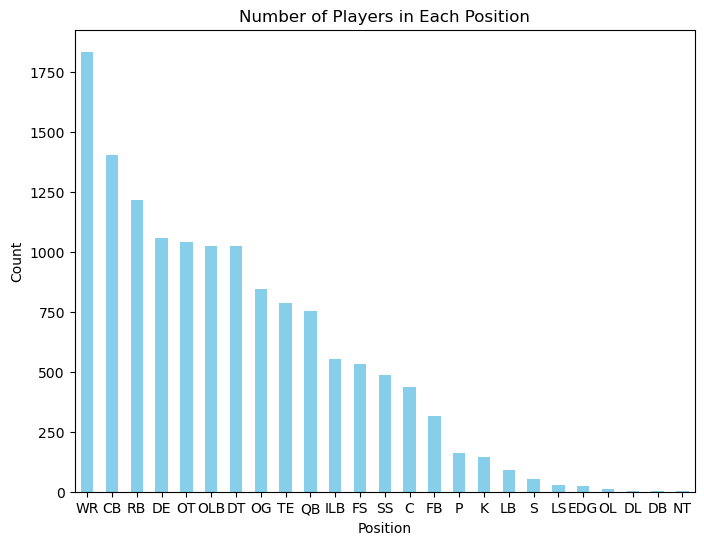

In [4]:
#print(df[df['Pro Bowl']==1].to_string())
def show_pos_counts(df):
    plt.figure(figsize=(8, 6))
    df['POS'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Number of Players in Each Position')
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
show_pos_counts(df)

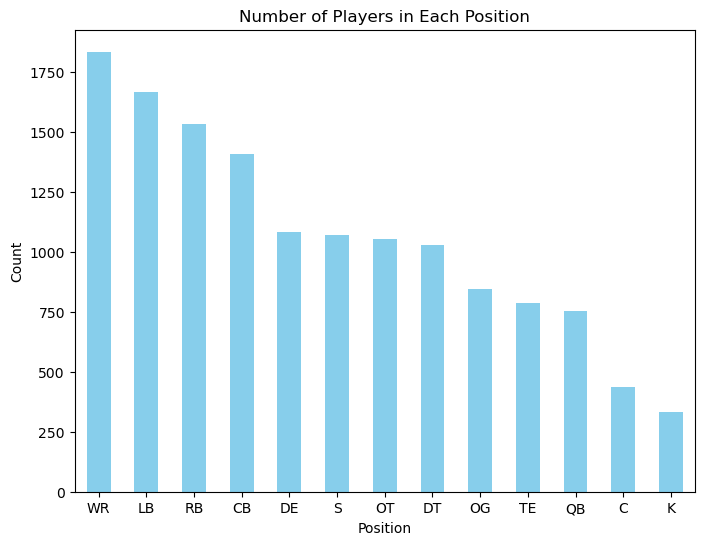

In [5]:
df['POS'] = df['POS'].replace('FS', 'S')
df['POS'] = df['POS'].replace('SS', 'S')
df['POS'] = df['POS'].replace('NT', 'DT')
df['POS'] = df['POS'].replace('DB', 'CB')
df['POS'] = df['POS'].replace('DL', 'DT')
df['POS'] = df['POS'].replace('OL', 'OT')
df['POS'] = df['POS'].replace('EDG', 'DE')
df['POS'] = df['POS'].replace('OLB', 'LB')
df['POS'] = df['POS'].replace('ILB', 'LB')
df['POS'] = df['POS'].replace('FB', 'RB')
df['POS'] = df['POS'].replace('P', 'K')
df['POS'] = df['POS'].replace('LS', 'K')

show_pos_counts(df)

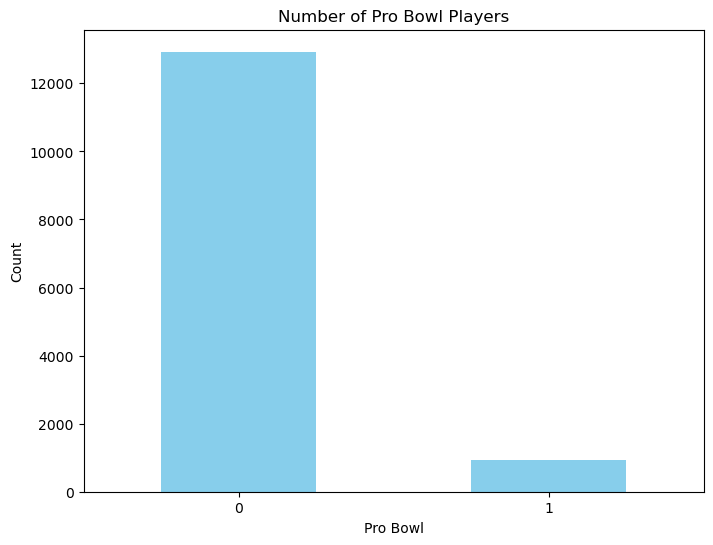

In [6]:
def show_PRO_BOWL_balance(df):
    plt.figure(figsize=(8, 6))
    df['Pro Bowl'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Number of Pro Bowl Players')
    plt.xlabel('Pro Bowl')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
show_PRO_BOWL_balance(df)

In [7]:
print(df.loc[df['Pro Bowl']==1]['POS'])

8        OT
12       DT
18        C
25       QB
34       DT
         ..
13133    OT
13139    OG
13155    WR
13174    CB
13537    CB
Name: POS, Length: 920, dtype: object


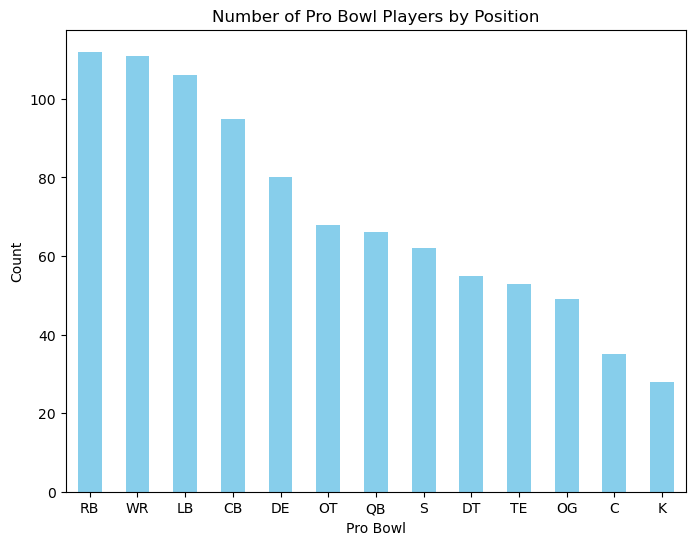

In [8]:
plt.figure(figsize=(8, 6))
df.loc[df['Pro Bowl']==1]['POS'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Pro Bowl Players by Position')
plt.xlabel('Pro Bowl')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
chance_of_pro_bowl = df.loc[df['Pro Bowl']==1]['POS'].value_counts() / df['POS'].value_counts() * 100
print(round(chance_of_pro_bowl.sort_values(), 3))

POS
DT    5.345
S     5.778
OG    5.785
WR    6.046
LB    6.347
OT    6.452
TE    6.717
CB    6.742
RB    7.292
DE    7.394
C     8.028
K     8.383
QB    8.742
Name: count, dtype: float64


In [10]:
print(df.head(10))

   Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  Vert Leap (in)  \
0  1987  CB         69.8           198     4.42           13            32.0   
1  1987   C         74.8           266     4.97           25            26.5   
2  1987  RB         71.8           217     4.81           15            28.7   
3  1987   C         75.0           279     5.13           22            27.5   
4  1987  WR         72.1           202     4.64            7            32.0   
5  1987  DE         76.5           273     4.86           18            28.5   
6  1987  CB         73.6           208     4.69           15            31.0   
7  1987  RB         72.3           220     4.71           18            31.0   
8  1987  OT         76.0           284     5.05           22            27.0   
9  1987   S         71.3           191     4.58           14            31.0   

   Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
0              118     4.60   7.31         0  
1              103     4.

In [11]:
print(df.loc[df['Pro Bowl']==1]['POS'].value_counts())
unique_POS = ['RB', 'WR', 'LB', 'CB', 'DE', 'OT', 'QB', 'S', 'DT', 'TE', 'OG', 'C', 'K']
subset_dfs = []
for num, pos in enumerate(unique_POS):
    subset_df = df[(df['POS'] == pos) & (df['Pro Bowl'] == 0) & (df['Year']!=2023)]
    for ind, val in enumerate(df.loc[df['Pro Bowl']==1]['POS'].value_counts()):
        if(ind==num):
            subset_df = subset_df.sample(n=val, random_state=42)
    subset_dfs.append(subset_df)

sampled_df = pd.concat(subset_dfs)
print(sampled_df.head())

POS
RB    112
WR    111
LB    106
CB     95
DE     80
OT     68
QB     66
S      62
DT     55
TE     53
OG     49
C      35
K      28
Name: count, dtype: int64
       Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  \
3080   1996  RB        72.10           242     4.86           20   
12255  2019  RB        72.63           228     4.58           19   
11762  2018  RB        74.00           247     4.69           25   
9172   2014  RB        71.63           209     4.60           16   
4064   1999  RB        72.30           268     4.81           18   

       Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
3080             32.5              117     4.47   7.31         0  
12255            29.5              114     4.31   7.53         0  
11762            33.0              121     4.18   6.98         0  
9172             35.5              116     4.41   7.31         0  
4064             31.5              105     4.70   8.06         0  


In [12]:
#print(df.loc[df["Pro Bowl"]==1].to_string())
sampled_df = pd.concat([sampled_df, df.loc[df["Pro Bowl"]==1]])
print(sampled_df.head())

       Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  \
3080   1996  RB        72.10           242     4.86           20   
12255  2019  RB        72.63           228     4.58           19   
11762  2018  RB        74.00           247     4.69           25   
9172   2014  RB        71.63           209     4.60           16   
4064   1999  RB        72.30           268     4.81           18   

       Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
3080             32.5              117     4.47   7.31         0  
12255            29.5              114     4.31   7.53         0  
11762            33.0              121     4.18   6.98         0  
9172             35.5              116     4.41   7.31         0  
4064             31.5              105     4.70   8.06         0  


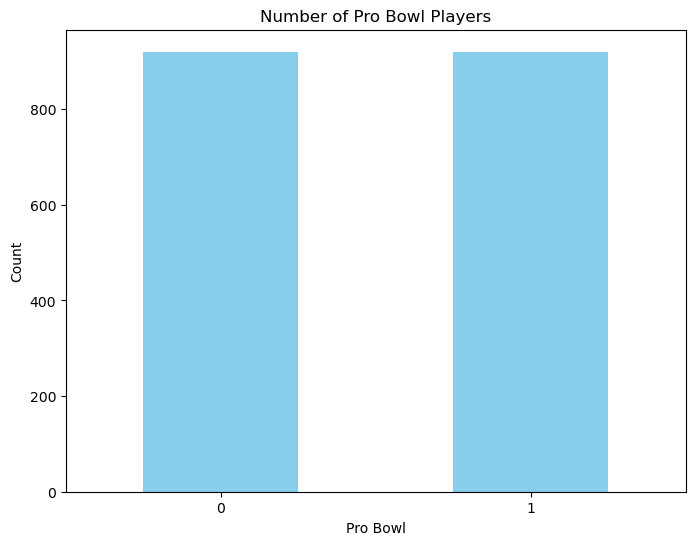

       Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  \
7234   2009   K        72.88           220     4.78           22   
595    1989  DE        75.50           256     4.85           20   
12806  2020  DE        76.88           264     4.74           20   
10303  2016  WR        68.13           185     4.29           13   
2679   1994   C        74.60           270     4.90           19   

       Vert Leap (in)  Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
7234             33.0              113     4.45   7.31         1  
595              31.4              110     4.44   7.31         1  
12806            33.5              116     4.46   7.31         1  
10303            40.5              129     4.06   6.53         1  
2679             30.7              111     4.47   7.31         1  


In [13]:
show_PRO_BOWL_balance(sampled_df)
sampled_df = sampled_df.sample(frac=1)
print(sampled_df.head())

In [14]:
#sampled_df.to_csv('sampled_data.csv', index=False)

In [15]:
sampled_df = pd.read_csv('sampled_data.csv')

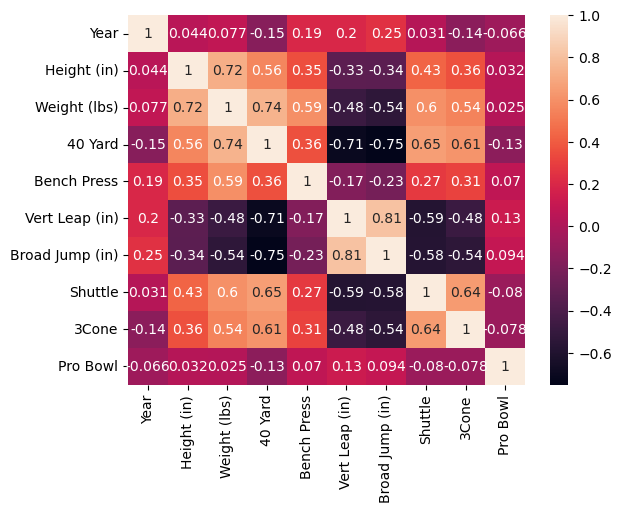

In [16]:
corr_matrix = sampled_df.select_dtypes(include=['number'])
corr_matrix = corr_matrix.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
categorical_col = ['Year', 'POS']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(sampled_df[categorical_col]).toarray()

In [18]:
numerical_col = ["Height (in)", "Weight (lbs)", "40 Yard", "Bench Press", "Vert Leap (in)", "Broad Jump (in)", "Shuttle", "3Cone"]
scalar = StandardScaler()
scaled_numerical_features = scalar.fit_transform(sampled_df[numerical_col])

In [19]:
preprocessed_data = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical_features)], axis=1)
print(preprocessed_data.to_string())

       0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48        0         1         2         3         4         5         6         7 
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.353978 -0.458351 -0.012407  0.341786  0.081594 -0.152096  0.246981  0.087014
1     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.641482  0.353445  0.236111 -0.011422 -0.320301 -0.503379  0.202489  0.087014
2     0.0 

In [20]:
labels = sampled_df["Pro Bowl"]
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('val_accuracy') > 0.70):

      # Stop if threshold is met
      print("\nValidation Accuracy is higher then 0.67 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1856      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12417 (48.50 KB)
Trainable params: 12417 (48.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
42/42 [==============================] - 0s 3ms/step - loss: 1.9979 - accuracy: 0.5227 - val_loss: 1.6440 - val_accuracy: 0.6145
Epoch 2/25
42/42 [==============================] - 0s 915us/step - loss: 1.4178 - accuracy: 0.5423 - val_loss: 1.2118 - val_accuracy: 0.5873
Epoch 3/25
42/42 [==============================] - 0s 890us/step - loss: 1.0855 - accuracy: 0.5544 - val_loss: 0.9699 - val_accuracy: 0.6175
Epoch 4/25
42/42 [==============================] - 0s 927us/step - loss: 0.9019 - accuracy: 0.5597 - val_loss: 0.8383 - val_accuracy: 0.5633
Epoch 5/25
42/42 [==============================] - 0s 915us/step - loss: 0.8051 - accuracy: 0.5491 - val_loss: 0.7683 - val_accuracy: 0.5723
Epoch 6/25
42/42 [==============================] - 0s 854us/step - loss: 0.7510 - accuracy: 0.5733 - val_loss: 0.7275 - val_accuracy: 0.6355
Epoch 7/25
42/42 [==============================] - 0s 881us/step - loss: 0.7236 - accuracy: 0.5778 - val_loss: 0.7070 - val_accuracy: 0.6235
Epoch 8/

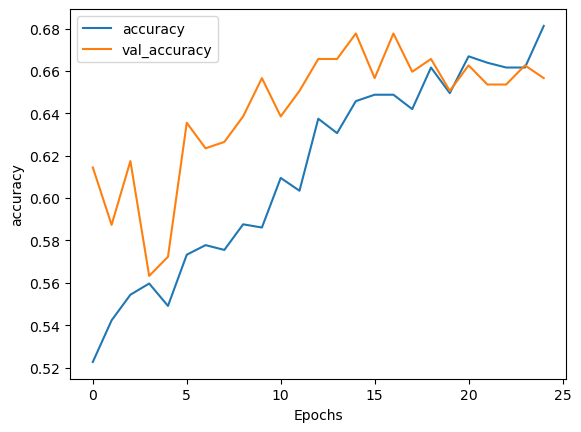

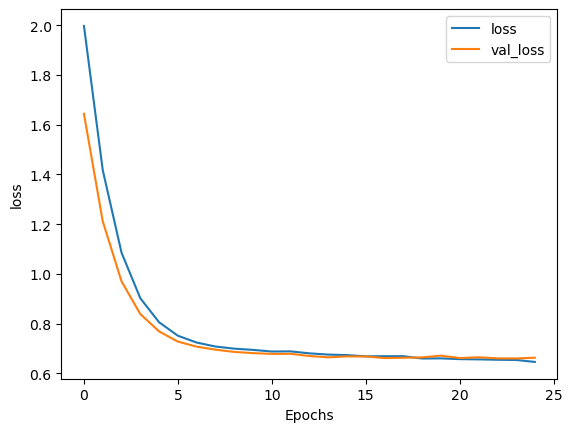

In [26]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
plot_history(history, 'accuracy')
plot_history(history, 'loss')

In [27]:
results = model.evaluate(X_test, y_test, verbose=2)
print("test loss, test acc:", results)

6/6 - 0s - loss: 0.7009 - accuracy: 0.6359 - 13ms/epoch - 2ms/step
test loss, test acc: [0.7009118795394897, 0.635869562625885]


In [28]:
#model.save('combine_prediction_model.keras')

In [29]:
#Additionally, you can calculate various evaluation metrics like accuracy, precision, recall, F1-score, and ROC AUC to assess the model's performance on your validation or test dataset.

In [30]:
#prediction = model.predict(X_test[:1])
#print("prediction:", prediction)